ÎùºÏù¥Î∏åÎü¨Î¶¨ Import

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï (ÏãúÍ∞ÅÌôî Ïä§ÌÉÄÏùº)
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False



Îç∞Ïù¥ÌÑ∞ÏÖã Îã§Ïö¥Î°úÎìú

> 40ÎßåÍ∞úÏùò ÎÇ†Ïî® Îç∞Ïù¥ÌÑ∞(2009~2016)



In [5]:
import urllib.request
import zipfile
import os

zip_url = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip'
zip_path = 'jena_climate_2009_2016.csv.zip'
csv_path = 'jena_climate_2009_2016.csv'

# Îã§Ïö¥Î°úÎìú
if not os.path.exists(zip_path):
    print("Downloading dataset...")
    urllib.request.urlretrieve(zip_url, zip_path)
    print("Download complete.")
else:
    print("Dataset already downloaded.")

# ÏïïÏ∂ï Ìï¥Ï†ú
if not os.path.exists(csv_path):
    print("Extracting dataset...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(".")
    print("Extraction complete.")
else:
    print("CSV file already exists.")


Dataset already downloaded.
CSV file already exists.


Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è ÌôïÏù∏

> .head()Î•º ÌÜµÌï¥ 5Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏàúÏÑúÎåÄÎ°ú Ï∂úÎ†•



In [6]:
import pandas as pd

df = pd.read_csv('jena_climate_2009_2016.csv')  # Ïù¥ÎØ∏ Ï∂îÏ∂úÎêú CSV ÌååÏùº Í≤ΩÎ°ú
print(df.head())  # ÏÉÅÏúÑ 5Í∞ú Ìñâ Ï∂úÎ†•


             Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03        

Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÎùºÎ≤® Îç∞Ïù¥ÌÑ∞Î°ú Î≥ÄÌôò

> history_size : Ïö∞Î¶¨Í∞Ä Î≥º Ïàò ÏûàÎäî Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞
  target_size : Ïö∞Î¶¨Í∞Ä ÏòàÏ∏°Ìï† Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞



In [7]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)


Train setÍ≥º Vallidation setÏùÑ ÎÇòÎàå Í∏∞Ï§Ä Î≥ÄÏàò ÏÑ§Ï†ï

> 40Îßå Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º Train 30Îßå, Val 10ÎßåÏúºÎ°ú Î∂ÑÌï†



In [8]:
TRAIN_SPLIT = 300000

Ïò®ÎèÑ Î≥ÄÌôîÎüâ ÏãúÍ≥ÑÏó¥ ÏòàÏ∏°

In [9]:
uni_data = df['T (degC)']
uni_data.index = df['Date Time']
print(uni_data.head())

Date Time
01.01.2009 00:10:00   -8.02
01.01.2009 00:20:00   -8.41
01.01.2009 00:30:00   -8.51
01.01.2009 00:40:00   -8.31
01.01.2009 00:50:00   -8.27
Name: T (degC), dtype: float64


Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î•º Í∑∏ÎûòÌîÑÎ°ú ÌôïÏù∏

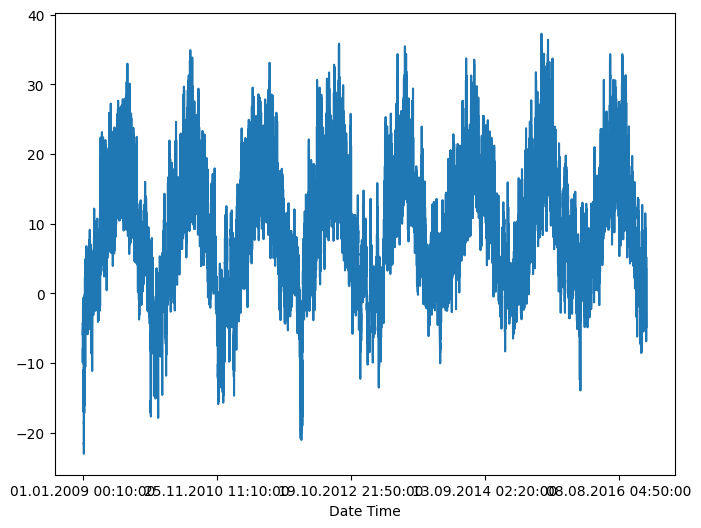

In [10]:
uni_data.plot(subplots=True)
plt.show()

ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±

> Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®Î°ú Normalization




In [11]:
uni_data = uni_data.values

uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

uni_data = (uni_data-uni_train_mean)/uni_train_std

Í≥ºÍ±∞ 20Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º Î≥¥Í≥† Î∞îÎ°ú Îí§Ïóê ÎØ∏ÎûòÎ•º ÏòàÏ∏°ÌïòÎèÑÎ°ù Îç∞Ïù¥ÌÑ∞ ÏÉù

In [12]:
univariate_past_history = 20
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ± Î∞è ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

In [13]:
print ('Single window of past history')
print (x_train_uni[10])
print ('\n Target temperature to predict')
print (y_train_uni[10])

Single window of past history
[[-2.08334362]
 [-2.09723778]
 [-2.09376424]
 [-2.09144854]
 [-2.07176515]
 [-2.07176515]
 [-2.07639653]
 [-2.08913285]
 [-2.09260639]
 [-2.10418486]
 [-2.10418486]
 [-2.09492208]
 [-2.10997409]
 [-2.11692118]
 [-2.13776242]
 [-2.16786644]
 [-2.16902429]
 [-2.15165658]
 [-2.16555075]
 [-2.1840763 ]]

 Target temperature to predict
-2.1887076840252155


Ïò®ÎèÑ Î≥ÄÌôîÎüâ ÏãúÍ≥ÑÏó¥ ÏòàÏ∏°

In [14]:
def create_time_steps(length):
    time_steps = []
    for i in range(-length, 0, 1):
        time_steps.append(i)
    return time_steps

In [15]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0
    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10,
                     label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    plt.show()
    return plt

Í∑∏ÎûòÌîÑÎ°ú ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

In [16]:
show_plot([x_train_uni[10], y_train_uni[10]], 0, 'Sample Example')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

Ïò®ÎèÑ Î≥ÄÌôîÎüâ ÏãúÍ≥ÑÏó¥ ÏòàÏ∏°

> Î≤†Ïù¥Ïä§ÎùºÏù∏(Í≥ºÍ±∞ Îç∞Ïù¥ÌÑ∞ ÌèâÍ∑†)Í≥º ÏïûÏúºÎ°ú ÌïôÏäµÌï† Ïã†Í≤ΩÎßù ÎπÑÍµê



In [17]:
def baseline(history):
    return np.mean(history)

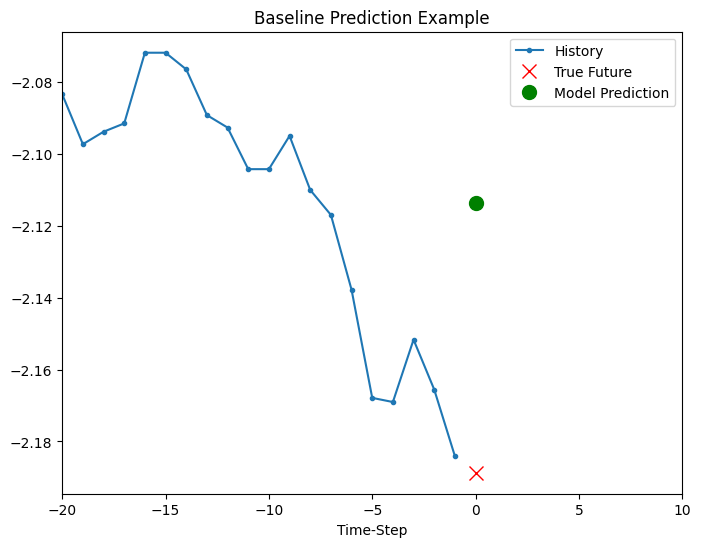

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

In [18]:
show_plot([x_train_uni[10], y_train_uni[10], baseline(x_train_uni[10])], 0,
           'Baseline Prediction Example')

PyTorch DataLoaderÎ•º ÏÇ¨Ïö©Ìï¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÖîÌîåÌïòÍ≥† ÎØ∏ÎãàbatchÎ°ú Íµ¨ÏÑ±


In [19]:
import torch
from torch.utils.data import TensorDataset, DataLoader

BATCH_SIZE = 256

# NumPy ‚Üí TensorÎ°ú Î≥ÄÌôò
x_train_tensor = torch.tensor(x_train_uni, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_uni, dtype=torch.float32)

x_val_tensor = torch.tensor(x_val_uni, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_uni, dtype=torch.float32)

# TensorDataset ÏÉùÏÑ±
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

# DataLoaderÎ°ú Î∞∞Ïπò Ï≤òÎ¶¨ & ÏÖîÌîå
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, drop_last=True)


PyTorchÏùò LSTM Í≥ÑÏ∏µÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏãúÍ≥ÑÏó¥ ÏòàÏ∏° Î™®Îç∏ ÏÉùÏÑ±

In [20]:
import torch
import torch.nn as nn

class SimpleLSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=8, output_size=1):
        super(SimpleLSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x shape: (batch_size, sequence_length, input_size)
        lstm_out, _ = self.lstm(x)  # lstm_out: (batch_size, seq_len, hidden_size)
        last_output = lstm_out[:, -1, :]  # ÎßàÏßÄÎßâ ÏãúÏ†ê hidden state
        return self.fc(last_output)       # ÏòàÏ∏°Í∞í (batch_size, output_size)


OptimizerÏôÄ Loss Ï†ïÏùò

In [21]:
model = SimpleLSTMModel()
criterion = nn.L1Loss()                   # MAE (mean absolute error)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


ÏÉòÌîåÎ°ú Ï∂úÎ†• ÌôïÏù∏

In [22]:
# Î™®Îç∏ÏùÑ ÌèâÍ∞Ä Î™®ÎìúÎ°ú Ï†ÑÌôò
model.eval()

# val_loaderÏóêÏÑú ÏÉòÌîå Î∞∞Ïπò Í∞ÄÏ†∏Ïò§Í∏∞
for x, y in val_loader:
    with torch.no_grad():  # Í∑∏ÎûòÎîîÏñ∏Ìä∏ Í≥ÑÏÇ∞ ÎπÑÌôúÏÑ±Ìôî (inference)
        output = model(x)
        print("ÏòàÏ∏° Í≤∞Í≥º shape:", output.shape)
    break  # Ìïú Î∞∞ÏπòÎßå ÌôïÏù∏


ÏòàÏ∏° Í≤∞Í≥º shape: torch.Size([256, 1])


LSTM Î™®Îç∏ ÌïôÏäµ

In [23]:
EPOCHS = 10
EVALUATION_INTERVAL = 200  # ÌïôÏäµ Î∞∞Ïπò Î∞òÎ≥µ ÌöüÏàò

model.train()  # ÌïôÏäµ Î™®Îìú Ï†ÑÌôò

for epoch in range(EPOCHS):
    running_loss = 0.0
    for step, (x_batch, y_batch) in enumerate(train_loader):
        # ÏàúÏ†ÑÌåå
        output = model(x_batch)
        loss = criterion(output.squeeze(), y_batch)

        # Ïó≠Ï†ÑÌåå Î∞è ÏòµÌã∞ÎßàÏù¥Ï†Ä Ïä§ÌÖù
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # ÏùºÏ†ï Í∞ÑÍ≤©ÎßàÎã§ ÌèâÍ∞Ä
        if step % EVALUATION_INTERVAL == 0:
            model.eval()
            val_losses = []
            with torch.no_grad():
                for x_val_batch, y_val_batch in val_loader:
                    val_pred = model(x_val_batch)
                    val_loss = criterion(val_pred.squeeze(), y_val_batch)
                    val_losses.append(val_loss.item())
            avg_train_loss = running_loss / (step + 1)
            avg_val_loss = sum(val_losses) / len(val_losses)
            print(f"[Epoch {epoch+1}] Step {step} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")
            model.train()


[Epoch 1] Step 0 | Train Loss: 0.9155 | Val Loss: 0.8262
[Epoch 1] Step 200 | Train Loss: 0.5587 | Val Loss: 0.1633
[Epoch 1] Step 400 | Train Loss: 0.3304 | Val Loss: 0.0592
[Epoch 1] Step 600 | Train Loss: 0.2362 | Val Loss: 0.0378
[Epoch 1] Step 800 | Train Loss: 0.1856 | Val Loss: 0.0294
[Epoch 1] Step 1000 | Train Loss: 0.1541 | Val Loss: 0.0259
[Epoch 2] Step 0 | Train Loss: 0.0245 | Val Loss: 0.0236
[Epoch 2] Step 200 | Train Loss: 0.0233 | Val Loss: 0.0218
[Epoch 2] Step 400 | Train Loss: 0.0225 | Val Loss: 0.0206
[Epoch 2] Step 600 | Train Loss: 0.0219 | Val Loss: 0.0197
[Epoch 2] Step 800 | Train Loss: 0.0214 | Val Loss: 0.0190
[Epoch 2] Step 1000 | Train Loss: 0.0209 | Val Loss: 0.0180
[Epoch 3] Step 0 | Train Loss: 0.0169 | Val Loss: 0.0183
[Epoch 3] Step 200 | Train Loss: 0.0179 | Val Loss: 0.0171
[Epoch 3] Step 400 | Train Loss: 0.0176 | Val Loss: 0.0166
[Epoch 3] Step 600 | Train Loss: 0.0174 | Val Loss: 0.0165
[Epoch 3] Step 800 | Train Loss: 0.0173 | Val Loss: 0.0159
[

ÌïôÏäµÌïú LSTM Î™®Îç∏Î°ú Î™áÎ™á ÏÉòÌîåÏóê ÎåÄÌïú ÏòàÏ∏° Ïã§Ìñâ

In [24]:
model.eval()  # ÌèâÍ∞Ä Î™®Îìú Ï†ÑÌôò

# val_loaderÏóêÏÑú 3Í∞úÏùò Î∞∞ÏπòÎßå Ï∂îÏ∂úÌï¥ÏÑú ÏòàÏ∏° & ÏãúÍ∞ÅÌôî
for step, (x_batch, y_batch) in enumerate(val_loader):
    if step >= 3:
        break

    with torch.no_grad():
        prediction = model(x_batch)  # shape: (batch_size, 1)

    # Ï≤´ Î≤àÏß∏ ÏÉòÌîåÎßå ÏãúÍ∞ÅÌôî
    x_sample = x_batch[0].numpy()
    y_sample = y_batch[0].item()
    pred_sample = prediction[0].item()

    show_plot([x_sample, y_sample, pred_sample], delta=0, title='Simple LSTM Model')


Ïò®ÎèÑÎøêÎßå ÏïÑÎãàÎùº ÎåÄÍ∏∞Ïïï, Í≥µÍ∏∞ Î∞ÄÎèÑ Îç∞Ïù¥ÌÑ∞Î•º Ï∂îÍ∞ÄÎ°ú ÏÇ¨Ïö©

In [25]:
features_considered = ['p (mbar)', 'T (degC)', 'rho (g/m**3)']

features = df[features_considered]
features.index = df['Date Time']
print(features.head())

                     p (mbar)  T (degC)  rho (g/m**3)
Date Time                                            
01.01.2009 00:10:00    996.52     -8.02       1307.75
01.01.2009 00:20:00    996.57     -8.41       1309.80
01.01.2009 00:30:00    996.53     -8.51       1310.24
01.01.2009 00:40:00    996.51     -8.31       1309.19
01.01.2009 00:50:00    996.51     -8.27       1309.00


ÏÑ†ÌÉùÌïú Îç∞Ïù¥ÌÑ∞Îì§ÏùÑ Í∑∏ÎûòÌîÑÎ°ú ÌôïÏù∏

In [26]:
features.plot(subplots=True)
plt.show()

ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±

In [30]:
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

dataset = (dataset-data_mean)/data_std

In [27]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

12ÏãúÍ∞Ñ Îí§(10Î∂Ñ*72Í∞ú ÌõÑ)Ïùò Îç∞Ïù¥ÌÑ∞Î•º ÏòàÏ∏°ÌïòÎèÑÎ°ù Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±

In [31]:
past_history = 720
future_target = 72
STEP = 6

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [32]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (120, 3)


Îã§Î≥ÄÎüâ ÏãúÍ≥ÑÏó¥ ÏòàÏ∏°ÏùÑ ÏúÑÌïú DataLoader Íµ¨ÏÑ±

In [33]:
from torch.utils.data import TensorDataset, DataLoader

# ÎÑòÌååÏù¥ Î∞∞Ïó¥ÏùÑ ÌÖêÏÑúÎ°ú Î≥ÄÌôò
x_train_tensor = torch.tensor(x_train_single, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_single, dtype=torch.float32)

x_val_tensor = torch.tensor(x_val_single, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_single, dtype=torch.float32)

# TensorDataset ÏÉùÏÑ±
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)

# DataLoaderÎ°ú ÏÖîÌîåÌïòÍ≥† Î∞∞Ïπò Íµ¨ÏÑ±
BATCH_SIZE = 256
BUFFER_SIZE = 10000  # PyTorchÏóêÏÑúÎäî ÏÇ¨Ïö© ÏïàÎê®

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, drop_last=True)


In [37]:
import torch.nn as nn

class MultivariateSingleStepLSTM(nn.Module):
    def __init__(self, input_size=3, hidden_size=32):
        super(MultivariateSingleStepLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)  # Dense layer

    def forward(self, x):
        out, _ = self.lstm(x)  # out: (batch, seq_len, hidden_size)
        out = out[:, -1, :]    # ÎßàÏßÄÎßâ ÌÉÄÏûÑÏä§ÌÖùÏùò hidden stateÎßå ÏÇ¨Ïö©
        out = self.fc(out)     # shape: (batch, 1)
        return out

model = MultivariateSingleStepLSTM(input_size=3, hidden_size=32)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.L1Loss()  # MAE


In [38]:
model.eval()  # ÌèâÍ∞Ä Î™®Îìú Ï†ÑÌôò

# Í≤ÄÏ¶ù Î∞∞Ïπò ÌïòÎÇò Í∞ÄÏ†∏Ïò§Í∏∞
for x_batch, y_batch in val_loader:
    with torch.no_grad():
        pred = model(x_batch)  # ÏòàÏ∏° Í≤∞Í≥º: (batch_size, 1)
    print(pred.shape)
    break  # Ìïú Î≤àÎßå Ïã§Ìñâ (take(1) Ïó≠Ìï†)


torch.Size([256, 1])


LSTM Î™®Îç∏ ÌïôÏäµ

In [44]:
import torch
import matplotlib.pyplot as plt

EPOCHS = 10
EVALUATION_INTERVAL = 200  # steps_per_epoch
VAL_STEPS = 50

# üî• ÏÜêÏã§ Î¶¨Ïä§Ìä∏ ÏÑ†Ïñ∏ (Í∑∏ÎûòÌîÑÏö©)
train_losses = []
val_losses = []

for epoch in range(EPOCHS):
    model.train()
    train_loss = 0.0
    for i, (x_batch, y_batch) in enumerate(train_loader):
        if i >= EVALUATION_INTERVAL:
            break

        optimizer.zero_grad()
        output = model(x_batch)
        loss = criterion(output.squeeze(), y_batch)  # y_batch shape: (batch,)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # üîç Í≤ÄÏ¶ù
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for j, (x_val, y_val) in enumerate(val_loader):
            if j >= VAL_STEPS:
                break
            val_pred = model(x_val)
            loss = criterion(val_pred.squeeze(), y_val)
            val_loss += loss.item()

    # üî• ÏóêÌè≠Îãπ ÌèâÍ∑† ÏÜêÏã§ Í≥ÑÏÇ∞
    avg_train_loss = train_loss / EVALUATION_INTERVAL
    avg_val_loss = val_loss / VAL_STEPS

    # ‚úÖ Î¶¨Ïä§Ìä∏Ïóê Ï†ÄÏû• (Í∑∏ÎûòÌîÑÏö©)
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch+1}/{EPOCHS} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

Epoch 1/10 | Train Loss: 0.2467 | Val Loss: 0.2363
Epoch 2/10 | Train Loss: 0.2457 | Val Loss: 0.2337
Epoch 3/10 | Train Loss: 0.2448 | Val Loss: 0.2326
Epoch 4/10 | Train Loss: 0.2431 | Val Loss: 0.2321
Epoch 5/10 | Train Loss: 0.2421 | Val Loss: 0.2311
Epoch 6/10 | Train Loss: 0.2410 | Val Loss: 0.2303
Epoch 7/10 | Train Loss: 0.2411 | Val Loss: 0.2386
Epoch 8/10 | Train Loss: 0.2384 | Val Loss: 0.2346
Epoch 9/10 | Train Loss: 0.2374 | Val Loss: 0.2362
Epoch 10/10 | Train Loss: 0.2372 | Val Loss: 0.2307


ÌïôÏäµ Loss ÌëúÏãú

In [45]:
def plot_train_history(train_losses, val_losses, title):
    epochs = range(len(train_losses))

    plt.figure()
    plt.plot(epochs, train_losses, 'bo-', label='Training loss')
    plt.plot(epochs, val_losses, 'ro-', label='Validation loss')
    plt.ylim(min(min(train_losses), min(val_losses)) - 0.02,
             max(max(train_losses), max(val_losses)) + 0.02)
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

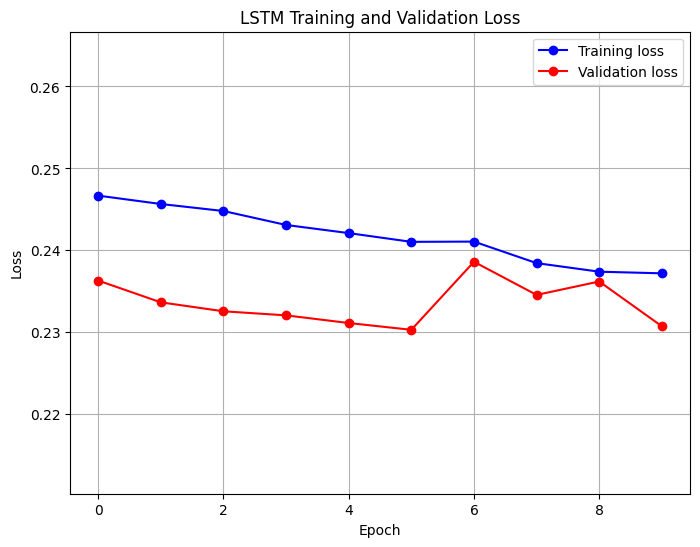

In [46]:
plot_train_history(train_losses, val_losses, "LSTM Training and Validation Loss")

Îã§Î≥ÄÎüâ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ ÌïôÏäµ ÌõÑ Î™®Îç∏Î°ú ÏÉòÌîå ÏòàÏ∏°

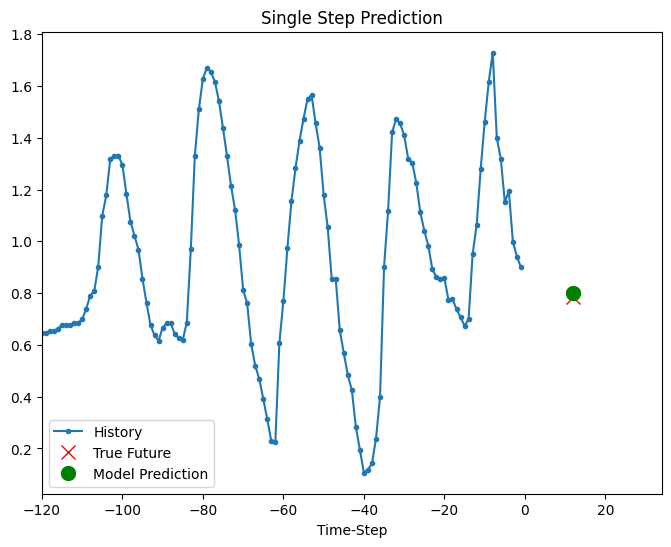

In [47]:
# PyTorchÏö© ÏòàÏ∏° Î∞è ÏãúÍ∞ÅÌôî ÏΩîÎìú (3Í∞ú ÏÉòÌîåÎßå ÏòàÏ∏°Ìï¥ ÏãúÍ∞ÅÌôî)
model.eval()
count = 0

with torch.no_grad():
    for x_batch, y_batch in val_loader:
        if count >= 3:
            break

        # Î∞∞ÏπòÏóêÏÑú Ï≤´ ÏÉòÌîåÎßå ÏãúÍ∞ÅÌôî
        x_sample = x_batch[0]  # shape: [seq_len, num_features]
        y_sample = y_batch[0]  # shape: [1]

        # ÏòàÏ∏°
        pred = model(x_batch)[0].item()

        # Ïò®ÎèÑÍ∞íÎßå Ï∂îÏ∂ú (Îëê Î≤àÏß∏ ÌîºÏ≤ò = Ïò®ÎèÑ)
        history_temp = x_sample[:, 1].numpy()
        true_value = y_sample.item()
        predicted_value = pred

        # ÏãúÍ∞ÅÌôî
        show_plot([history_temp, true_value, predicted_value], 12, 'Single Step Prediction')
        count += 1


Îã§Î≥ÄÎüâ ÏãúÍ≥ÑÏó¥ ÏòàÏ∏° - Ïó¨Îü¨ ÏãúÍ∞Ñ ÏßÄÏ†êÏùò ÎØ∏ÎûòÎ•º ÏòàÏ∏°

> ÏûÖÎ†•: Í≥ºÍ±∞ 5ÏùºÏπò Îç∞Ïù¥ÌÑ∞Î•º 1ÏãúÍ∞Ñ Í∞ÑÍ≤©(STEP=6)ÏúºÎ°ú Ï∂îÏ∂ú (Ï¶â, Ï¥ù 120Í∞ú ÏãúÍ≥ÑÏó¥ Ìè¨Ïù∏Ìä∏)

> Ï∂úÎ†•: 12ÏãúÍ∞Ñ(=72Í∞ú, 10Î∂Ñ Í∞ÑÍ≤©)Ïùò ÎØ∏Îûò Ïò®ÎèÑ ÏòàÏ∏°



In [48]:
future_target = 72
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target temperature to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (120, 3)

 Target temperature to predict : (72,)


Îã§Î≥ÄÎüâ ÏãúÍ≥ÑÏó¥ ÏòàÏ∏°ÏùÑ ÏúÑÌïú DataLoader Íµ¨ÏÑ±

In [53]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# ÎÑòÌååÏù¥ ‚Üí ÌÖêÏÑú Î≥ÄÌôò
x_train_multi_tensor = torch.tensor(x_train_multi, dtype=torch.float32)
y_train_multi_tensor = torch.tensor(y_train_multi, dtype=torch.float32)

x_val_multi_tensor = torch.tensor(x_val_multi, dtype=torch.float32)
y_val_multi_tensor = torch.tensor(y_val_multi, dtype=torch.float32)

# TensorDataset ÏÉùÏÑ±
train_dataset_multi = TensorDataset(x_train_multi_tensor, y_train_multi_tensor)
val_dataset_multi = TensorDataset(x_val_multi_tensor, y_val_multi_tensor)

# DataLoaderÎ°ú ÏÖîÌîå Î∞è Î∞∞Ïπò Ï≤òÎ¶¨
BATCH_SIZE = 256

train_loader_multi = DataLoader(train_dataset_multi, batch_size=BATCH_SIZE, shuffle=True)
val_loader_multi = DataLoader(val_dataset_multi, batch_size=BATCH_SIZE, shuffle=False)


In [57]:
def create_time_steps(length):
    return list(range(-length, 0))  # Í≥ºÍ±∞ ÏãúÏ†ê: -120 ~ -1 Îì±

def multi_step_plot(history, true_future, prediction=None, step=1):
    """
    history: (seq_len, num_features) ‚Üí Í≥ºÍ±∞ ÏûÖÎ†•
    true_future: (target_len,) ‚Üí Ïã§Ï†ú ÎØ∏Îûò ÏãúÍ≥ÑÏó¥
    prediction: (target_len,) ‚Üí ÏòàÏ∏°Îêú ÎØ∏Îûò ÏãúÍ≥ÑÏó¥
    step: STEP Í∞í (Ïòà: 6 ‚Üí 1ÏãúÍ∞Ñ Îã®ÏúÑ)
    """
    plt.figure(figsize=(12, 6))

    num_in = create_time_steps(len(history))         # ÏûÖÎ†• ÏãúÏ†ê Ï∂ï: ÏùåÏàò ÏãúÍ∞Ñ
    num_out = np.arange(len(true_future)) / step     # ÎØ∏Îûò ÏãúÏ†ê Ï∂ï: 0Î∂ÄÌÑ∞ ÏãúÏûë

    # Ïò®ÎèÑ ÌûàÏä§ÌÜ†Î¶¨ (2Î≤àÏß∏ ÌîºÏ≤ò = 'T (degC)')
    plt.plot(num_in, history[:, 1], label='History')

    # Ïã§Ï†ú ÎØ∏Îûò Í∞í
    plt.plot(num_out, true_future, 'bo', label='True Future')

    # ÏòàÏ∏°Îêú ÎØ∏Îûò Í∞í (ÏûàÏùÑ Í≤ΩÏö∞)
    if prediction is not None and len(prediction) > 0:
        plt.plot(num_out, prediction, 'ro', label='Predicted Future')

    plt.xlabel('Time Step')
    plt.ylabel('Temperature')
    plt.title('Multi-step Forecast')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()


ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ Ï∂úÎ†•

In [58]:
# ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî (ÏòàÏ∏° ÏóÜÏù¥ ÌûàÏä§ÌÜ†Î¶¨ + Ïã§Ï†ú ÎØ∏ÎûòÎßå)
for x_batch, y_batch in train_loader_multi:
    x_sample = x_batch[0]  # shape: (120, 3)
    y_sample = y_batch[0]  # shape: (72,)

    # NumPy Î≥ÄÌôò ÌõÑ ÏãúÍ∞ÅÌôî
    multi_step_plot(
        history=x_sample.cpu().numpy(),
        true_future=y_sample.cpu().numpy(),
        prediction=np.array([]),  # ÏòàÏ∏° ÏóÜÏù¥ Îπà Î∞∞Ïó¥ Ï†ÑÎã¨
        step=STEP
    )
    break  # Ìïú ÏÉòÌîåÎßå Ï∂úÎ†•


LSTM Ïã†Í≤ΩÎßù Î™®Îç∏ ÏÉùÏÑ±

> 72Í∞ú ÎØ∏Îûò ÏòàÏ∏°ÏùÑ ÏúÑÌïú 72Í∞ú Ï∂úÎ†• ÏÑ§Ï†ï



In [59]:
import torch
import torch.nn as nn

class MultiStepLSTM(nn.Module):
    def __init__(self, input_size=3, hidden_size1=32, hidden_size2=16, output_size=72):
        super(MultiStepLSTM, self).__init__()

        self.lstm1 = nn.LSTM(input_size=input_size,
                             hidden_size=hidden_size1,
                             batch_first=True,
                             bidirectional=False)

        self.lstm2 = nn.LSTM(input_size=hidden_size1,
                             hidden_size=hidden_size2,
                             batch_first=True)

        self.relu = nn.ReLU()
        self.fc = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        out, _ = self.lstm1(x)          # out: (batch, seq_len, hidden_size1)
        out, _ = self.lstm2(out)        # out: (batch, seq_len, hidden_size2)
        out = self.relu(out[:, -1, :])  # ÎßàÏßÄÎßâ ÌÉÄÏûÑÏä§ÌÖù, ReLU ÌôúÏÑ±Ìôî
        out = self.fc(out)              # Ï∂úÎ†•: (batch, 72)
        return out


In [60]:
# ÌèâÍ∞Ä Î™®ÎìúÎ°ú Ï†ÑÌôò
model.eval()

with torch.no_grad():
    for x_batch, y_batch in val_loader_multi:
        output = model(x_batch)  # ÏòàÏ∏° Í≤∞Í≥º
        print("Î™®Îç∏ Ï∂úÎ†• shape:", output.shape)
        break  # Ï≤´ Î∞∞ÏπòÎßå ÌôïÏù∏ (take(1) ÎåÄÏùë)


Î™®Îç∏ Ï∂úÎ†• shape: torch.Size([256, 72])


ÌïôÏäµ

In [61]:
import torch
import matplotlib.pyplot as plt

EPOCHS = 10
EVALUATION_INTERVAL = 200
VAL_STEPS = 50

train_losses = []
val_losses = []

for epoch in range(EPOCHS):
    model.train()
    train_loss = 0.0

    for i, (x_batch, y_batch) in enumerate(train_loader_multi):
        if i >= EVALUATION_INTERVAL:
            break

        optimizer.zero_grad()
        output = model(x_batch)              # (batch, 72)
        loss = criterion(output, y_batch)    # MAE
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Í≤ÄÏ¶ù
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for j, (x_val, y_val) in enumerate(val_loader_multi):
            if j >= VAL_STEPS:
                break
            val_pred = model(x_val)
            loss = criterion(val_pred, y_val)
            val_loss += loss.item()

    avg_train_loss = train_loss / EVALUATION_INTERVAL
    avg_val_loss = val_loss / VAL_STEPS

    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)

    print(f"[Epoch {epoch+1}/{EPOCHS}] Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")


[Epoch 1/10] Train Loss: 0.4624 | Val Loss: 0.2772
[Epoch 2/10] Train Loss: 0.3087 | Val Loss: 0.2135
[Epoch 3/10] Train Loss: 0.2236 | Val Loss: 0.1927
[Epoch 4/10] Train Loss: 0.2047 | Val Loss: 0.1928
[Epoch 5/10] Train Loss: 0.1977 | Val Loss: 0.1872
[Epoch 6/10] Train Loss: 0.1942 | Val Loss: 0.1858
[Epoch 7/10] Train Loss: 0.1912 | Val Loss: 0.1838
[Epoch 8/10] Train Loss: 0.1912 | Val Loss: 0.1846
[Epoch 9/10] Train Loss: 0.1879 | Val Loss: 0.1820
[Epoch 10/10] Train Loss: 0.1873 | Val Loss: 0.1805


ÌïôÏäµ Loss ÌôïÏù∏

In [62]:
def plot_train_history(train_losses, val_losses, title):
    epochs = range(len(train_losses))
    plt.figure()
    plt.plot(epochs, train_losses, 'bo-', label='Training Loss')
    plt.plot(epochs, val_losses, 'ro-', label='Validation Loss')
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("MAE Loss")
    plt.grid(True)
    plt.legend()
    plt.show()


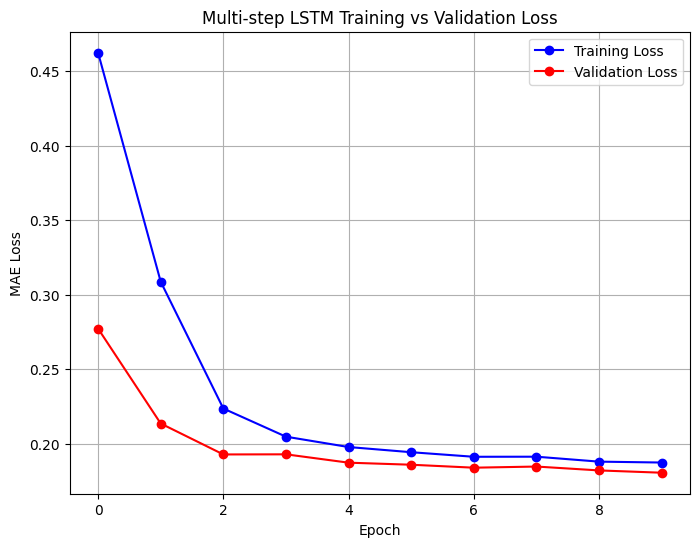

In [63]:
plot_train_history(train_losses, val_losses, "Multi-step LSTM Training vs Validation Loss")

ÌïôÏäµ ÌõÑ Î™®Îç∏Î°ú ÏÉòÌîå ÏòàÏ∏°

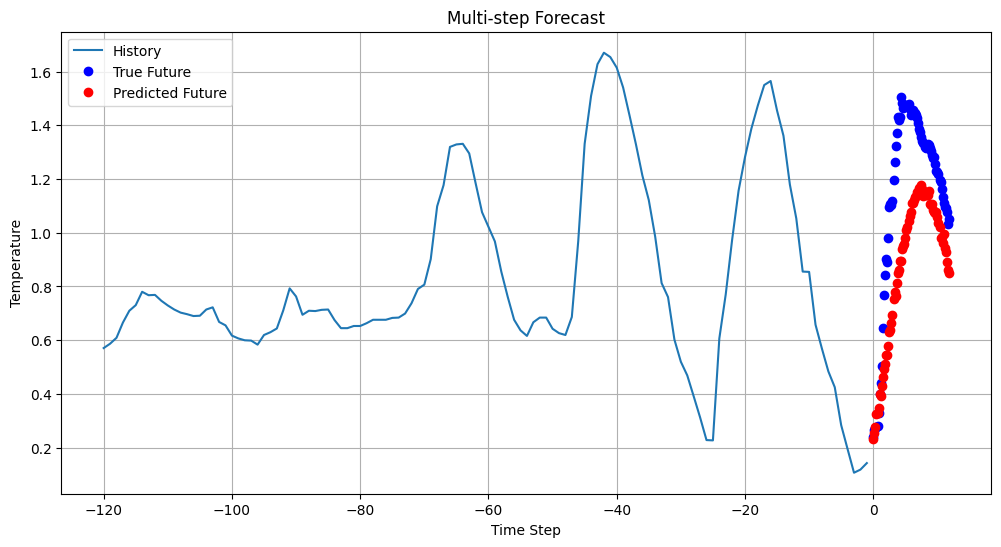

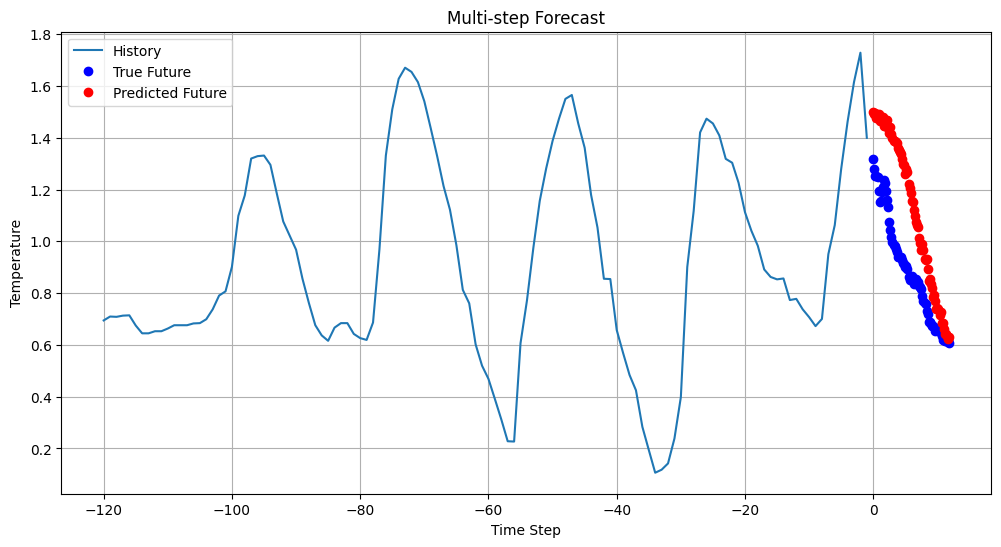

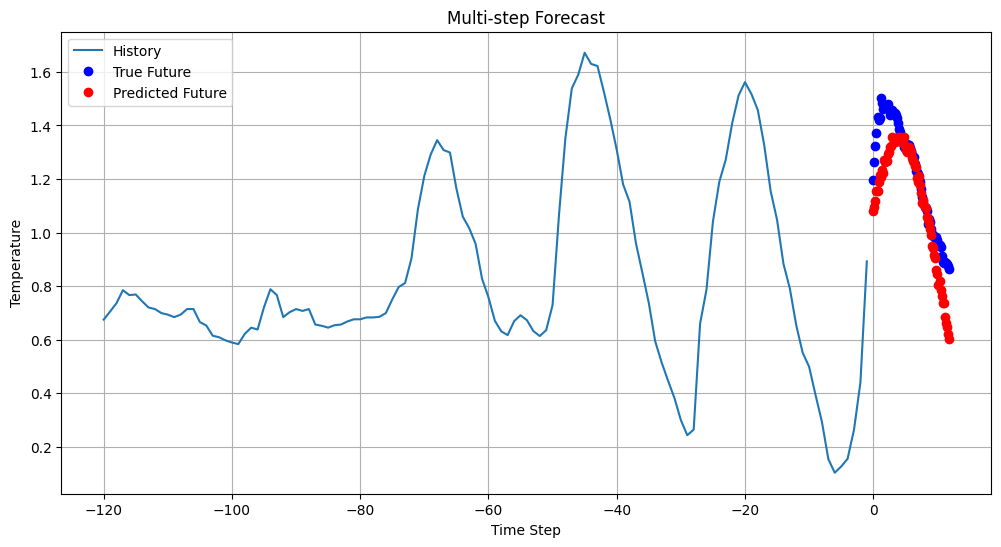

In [65]:
import random

with torch.no_grad():
    for x_batch, y_batch in val_loader_multi:
        indices = random.sample(range(x_batch.size(0)), 3)
        for i in indices:
            x_sample = x_batch[i]
            y_sample = y_batch[i]
            x_input = x_sample.unsqueeze(0)

            pred = model(x_input)[0].cpu().numpy()

            multi_step_plot(
                history=x_sample.cpu().numpy(),
                true_future=y_sample.cpu().numpy(),
                prediction=pred,
                step=STEP
            )
        break
